In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('New_fake_transactional_data_24.csv')

# If needed, select and scale the features
features = data[['monopoly_money_amount', 'from_totally_fake_account']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize the IsolationForest model
iso_forest = IsolationForest(contamination='auto', random_state=50, n_estimators=100)

# Fit the model
iso_forest.fit(scaled_features)

# Obtain the anomaly scores (the lower, the more abnormal)
scores = iso_forest.decision_function(scaled_features)

# Predictions: -1 for outliers, 1 for inliers
predictions = iso_forest.predict(scaled_features)

# Calculate IQR for the anomaly scores
Q1 = np.percentile(scores, 25)
Q3 = np.percentile(scores, 75)
IQR = Q3 - Q1

# Determine the anomaly score threshold using Tukey's method
threshold = Q3 + 1.5 * IQR

# Since scores are in the opposite of the anomaly score, we flip the sign for the threshold
outliers = scores < -threshold

# Count the number of outliers detected
num_outliers = np.sum(outliers)
print(f"Number of anomalies detected: {num_outliers}")

Number of anomalies detected: 174041


In [2]:
# Assuming 'scores' contains the anomaly scores from the Isolation Forest model,
# and 'data' is the original DataFrame with the transactional data.

# Convert the scores to a DataFrame for easier manipulation
anomaly_scores = pd.DataFrame(scores, columns=['score'])

# Add a column for the original data index
anomaly_scores['index'] = anomaly_scores.index

# Sort the DataFrame based on the anomaly score in ascending order
sorted_scores = anomaly_scores.sort_values(by='score', ascending=True)

# Get the top 10 anomalies (most negative scores)
top_10_anomalies = sorted_scores.head(10)

# Get the last 10 anomalies (least negative scores but still considered as outliers by the threshold)
last_10_anomalies = sorted_scores[sorted_scores['score'] < -threshold].tail(10)

# Retrieve the original data for the top 10 anomalies using their indices
top_10_anomalies_data = data.loc[top_10_anomalies['index']]

# Retrieve the original data for the last 10 anomalies using their indices
last_10_anomalies_data = data.loc[last_10_anomalies['index']]

# Print the top 10 anomalies
print("Top 10 Anomalies:")
print(top_10_anomalies_data)

# Print the last 10 anomalies
print("\nLast 10 Anomalies:")
print(last_10_anomalies_data)

Top 10 Anomalies:
         from_totally_fake_account  monopoly_money_amount  \
6034613                   100250.0                 1940.0   
2246334                   100250.0                 1975.0   
4352380                   100688.0                 1995.0   
966875                    100613.0                 1875.0   
8231914                   100645.0                 1870.0   
2406924                   100376.0                 1955.0   
1598431                   100656.0                 1890.0   
1121995                   100137.0                 1915.0   
5944627                   100338.0                 1980.0   
3521484                   100384.0                 1880.0   

        to_randomly_generated_account not_happened_yet_date  
6034613                         51590            20/09/2025  
2246334                         51590            07/04/2025  
4352380                         16948            07/07/2025  
966875                          66006            11/02/2025  


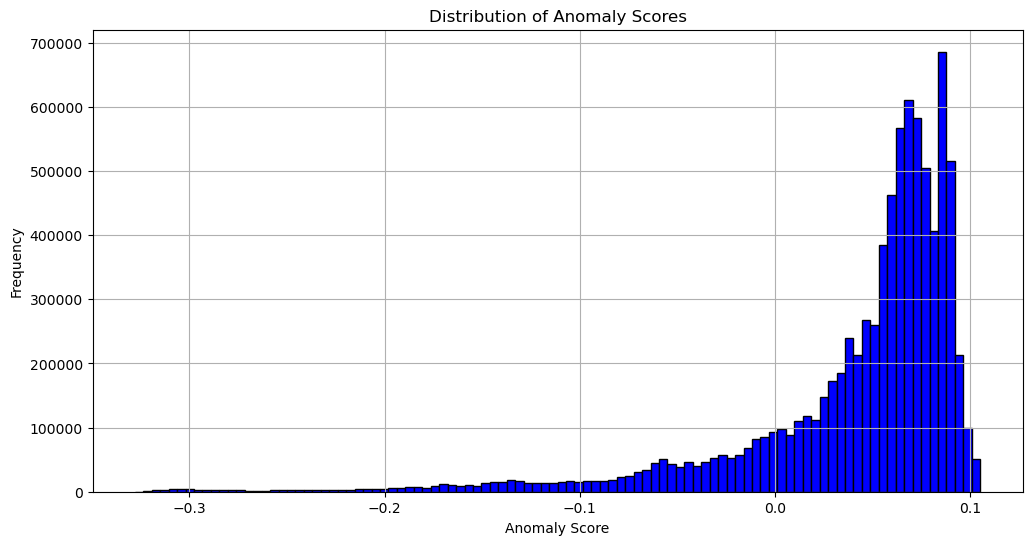

In [3]:
import matplotlib.pyplot as plt

# Assuming 'scores' contain the anomaly scores from the Isolation Forest
plt.figure(figsize=(12, 6))

# Plotting the histogram of anomaly scores
plt.hist(scores, bins=100, color='blue', edgecolor='black')

# Plot aesthetics
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

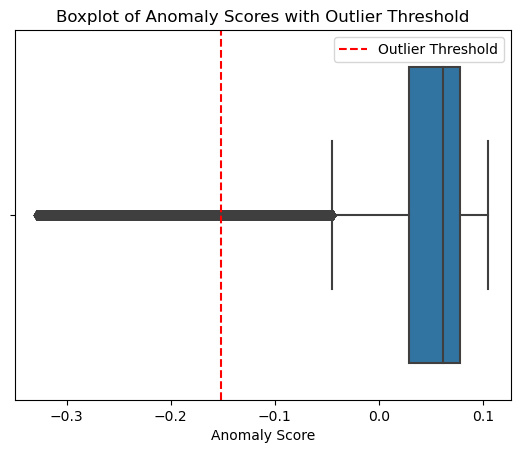

In [4]:
# Create a box plot for the anomaly scores
import seaborn as sns
sns.boxplot(x=scores)
plt.axvline(x=-threshold, color='r', linestyle='--', label='Outlier Threshold')
plt.title('Boxplot of Anomaly Scores with Outlier Threshold')
plt.xlabel('Anomaly Score')
plt.legend()
plt.show()

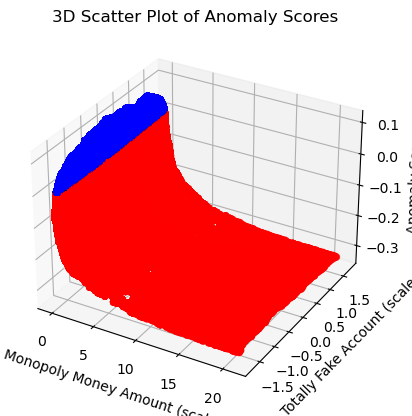

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# We assume that 'scaled_features' is a numpy array with at least two columns
# corresponding to 'monopoly_money_amount' and 'from_totally_fake_account', and that
# 'scores' is a numpy array containing the anomaly scores from the Isolation Forest.

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# The two features will be our x and y, and the anomaly scores will be our z
x = scaled_features[:, 0]  # 'monopoly_money_amount'
y = scaled_features[:, 1]  # 'from_totally_fake_account'
z = scores  # Anomaly scores

# Plot the points, color them using the predictions: outliers in red, inliers in blue
ax.scatter(x, y, z, c=['r' if p == -1 else 'b' for p in predictions], marker='o')

# Labels and title
ax.set_xlabel('Monopoly Money Amount (scaled)')
ax.set_ylabel('From Totally Fake Account (scaled)')
ax.set_zlabel('Anomaly Score')
ax.set_title('3D Scatter Plot of Anomaly Scores')

# Show the plot
plt.show()